In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

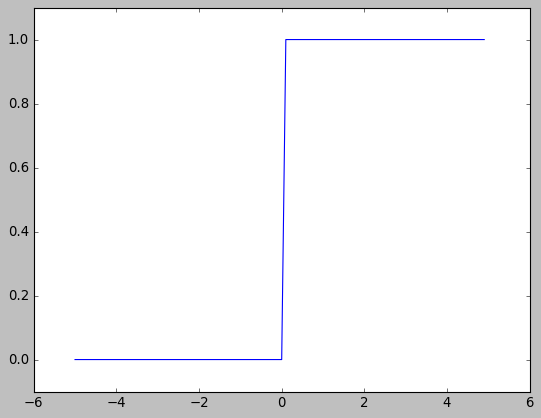

In [21]:
# 계단 함수 구현

def step_function(x) :
    return np.array(x > 0, dtype=int)

x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1,1.1)
plt.show()

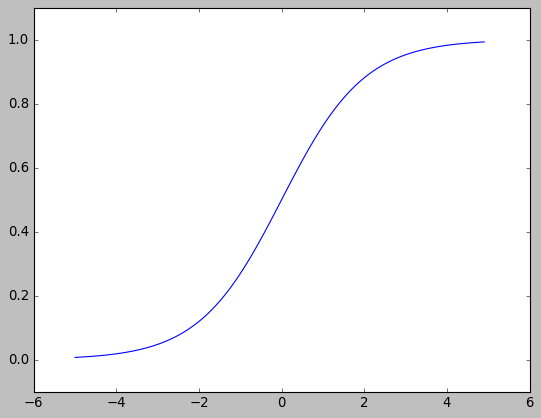

In [22]:
# 시그모이드 함수 구현

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1,1.1)
plt.show()

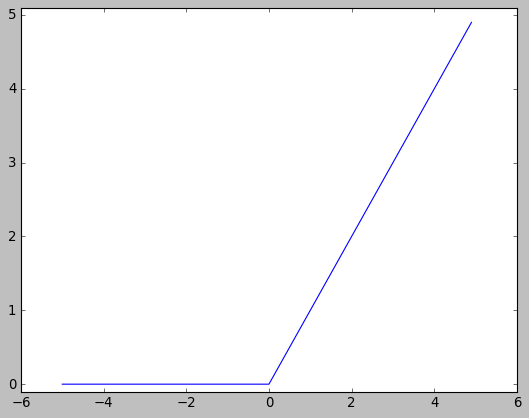

In [23]:
# ReLU 함수 구현
def relu(x) :
    return np.maximum(0,x)

x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1,5.1)
plt.show()


In [25]:
# 간단한 신경망 구현

def init_network() :
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],
                             [0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],
                             [0.2,0.5],
                             [0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],
                             [0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x) :
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    return a3

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
